In [1]:
import xarray as xr
import matplotlib.pyplot as plt
import numpy as np

nc_filebase='agg_macav2*' # To access multiple files

In [5]:
ds_ens=xr.open_mfdataset(nc_filebase, combine='nested',concat_dim='ens') # xr to open multiple files
# N.B ens is not in the data set, its just a dummy variable (simply creating an ensemble dataset)

In [9]:
ds_ens['precipitation'] # 4 dimensional ensemble datasets

<xarray.DataArray 'precipitation' (ens: 5, time: 1128, lat: 49, lon: 73)>
dask.array<concatenate, shape=(5, 1128, 49, 73), dtype=float32, chunksize=(1, 1128, 49, 73), chunktype=numpy.ndarray>
Coordinates:
  * time     (time) object 2006-01-15 00:00:00 ... 2099-12-15 00:00:00
  * lat      (lat) float64 46.48 46.52 46.56 46.6 ... 48.35 48.4 48.44 48.48
  * lon      (lon) float64 242.5 242.6 242.6 242.6 ... 245.4 245.4 245.5 245.5
Dimensions without coordinates: ens
Attributes:
    long_name:      Monthly Precipitation Amount
    units:          mm
    grid_mapping:   crs
    standard_name:  precipitation
    cell_methods:   time: sum(interval: 24 hours): sum over days
    comments:       Total monthly precipitation at surface: includes both liq...
    _ChunkSizes:    [ 10  44 107]

In [10]:
# Compute the ensemble mean
ds_ens['precipitation'].mean(dim='ens') 

<xarray.DataArray 'precipitation' (time: 1128, lat: 49, lon: 73)>
dask.array<mean_agg-aggregate, shape=(1128, 49, 73), dtype=float32, chunksize=(1128, 49, 73), chunktype=numpy.ndarray>
Coordinates:
  * time     (time) object 2006-01-15 00:00:00 ... 2099-12-15 00:00:00
  * lat      (lat) float64 46.48 46.52 46.56 46.6 ... 48.35 48.4 48.44 48.48
  * lon      (lon) float64 242.5 242.6 242.6 242.6 ... 245.4 245.4 245.5 245.5

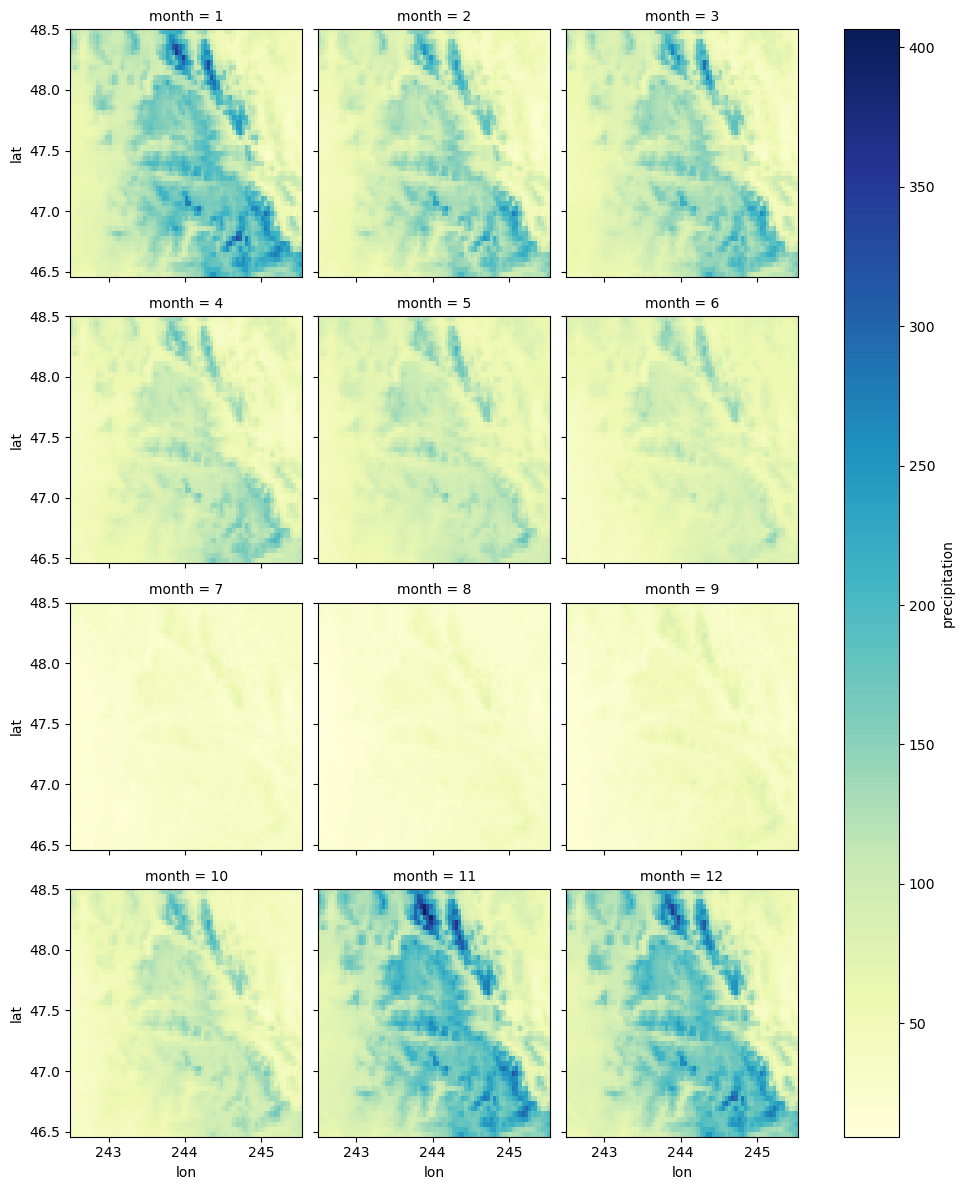

In [12]:
ds_ens['precipitation'].mean(dim='ens').groupby('time.month').mean(dim='time').plot(col='month',col_wrap=3,cmap='YlGnBu')  # Seasonality of the ensemble mean.



# On average all the models show that the temperature will show these information (given in the plot)

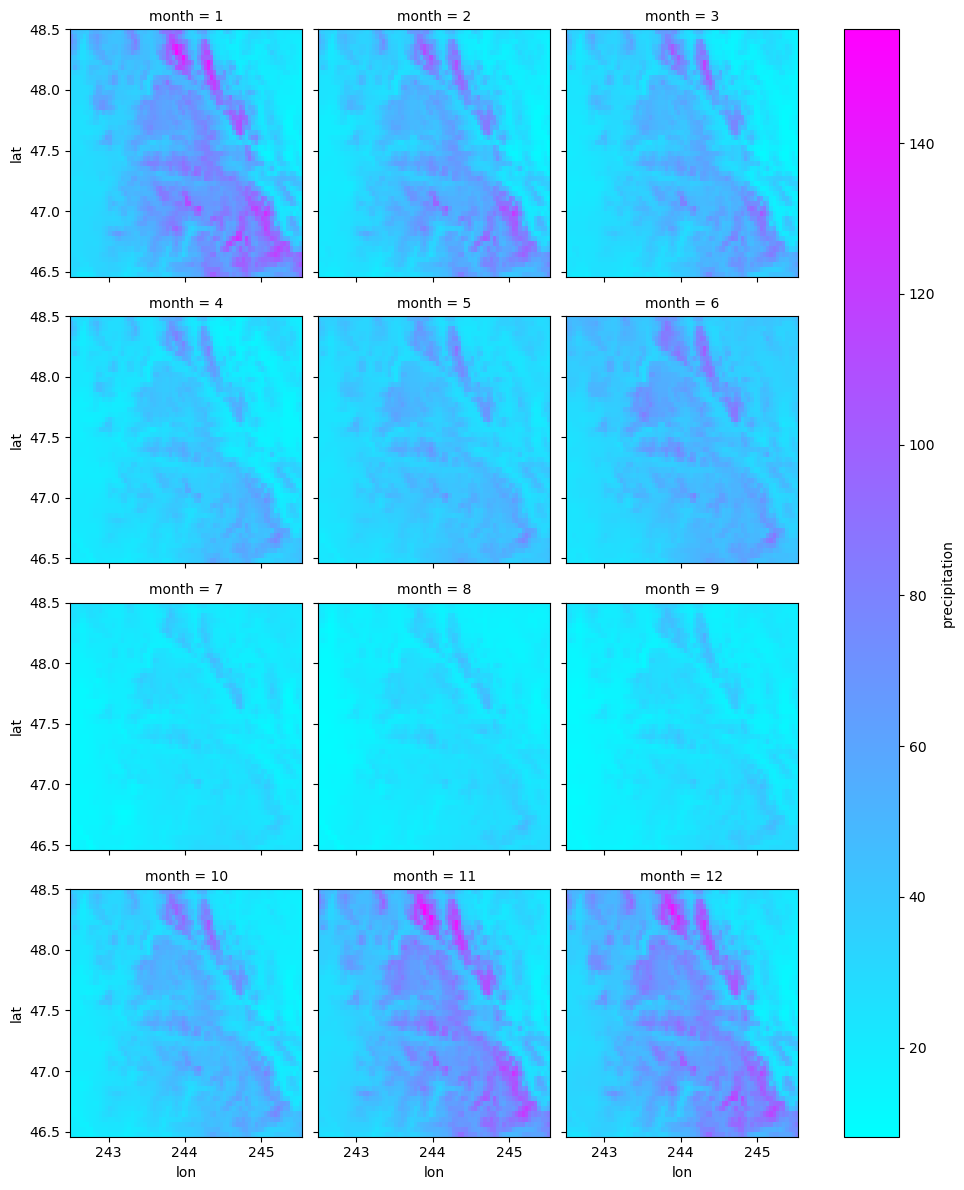

In [13]:
ds_ens['precipitation'].std(dim='ens').groupby('time.month').mean(dim='time').plot(col='month',col_wrap=3,cmap='cool') # standard deviation over the ensemble

In [14]:
# Interpretation!

In [ ]:
#1. The standard deviation is highest in the winter months
#2. It is highest at the highest topography
#3. It is highest in the wettest month
#4  The relative magnitude of uncertainty is highest in the summer time.

In [15]:
# we want to get our ensemble coefficeint variation i.e standard deviation diveded by the mean

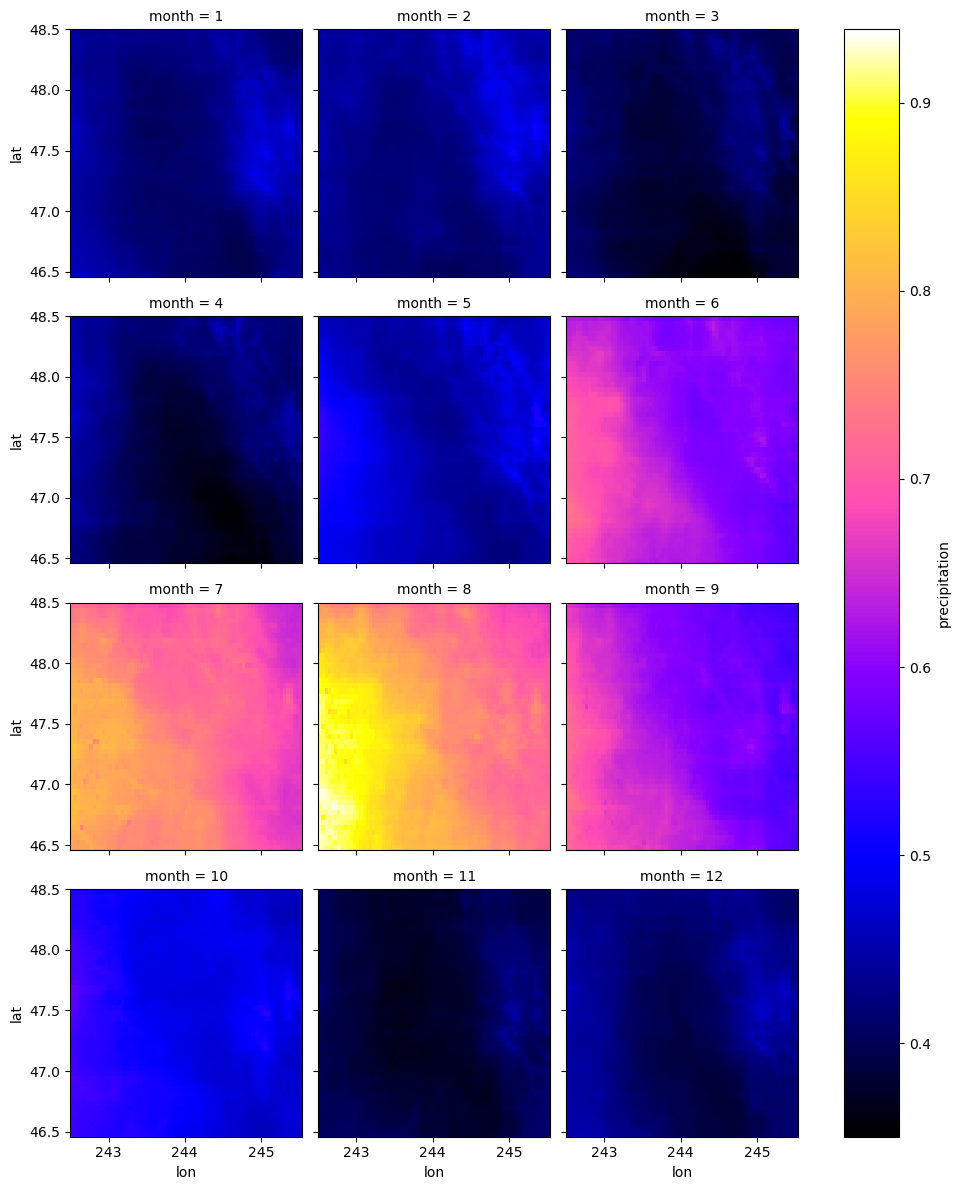

In [16]:
(ds_ens['precipitation'].std(dim='ens')/ds_ens['precipitation'].mean(dim='ens')).groupby('time.month').mean(dim='time').plot(col='month',col_wrap=3,cmap='gnuplot2')

In [ ]:
# Interpretation
#1. The cofficients of variations are highest in the summer months and lowest in the winter months which are the highest in precipitation
#2.  Also, we observe higher variabilities around the sounth-western part of the domain
#3.
